# Equity at the Two Ends of the 710 Freeway: Assessing Access to Parks for Tenants of Affordable Housing in the California Cities of Long Beach and Pasadena
### By Adriana Valencia Wences
### UP 206A: Introductiion to Geographic Information Systems and Spatial Data Analysis
### Fall 2021
### University of California, Los Angeles

In [1]:
# first I will import my libraries, which are essential to preform functions:

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# import Affordable Housing data for the two cities, attained from the National Housing Preservation Database; a user login is required to view raw data.
aff_housing = gpd.read_file('final_data/data_lb_pasadena.csv')

In [3]:
# let me check the data with the head command
aff_housing.head

<bound method NDFrame.head of                        PropertyName          PropertyAddress        City  \
0             MERIT HALL APARTMENTS           1035 Lewis Ave  Long Beach   
1                   DEL AMO GARDENS       225 W Del Amo Blvd  Long Beach   
2          AMERICAN GOLD STAR MANOR      3021 N Gold Star Dr  Long Beach   
3                PARK PACIFIC TOWER          714 Pacific Ave  Long Beach   
4                     SEAMIST TOWER        1451 Atlantic Ave  Long Beach   
..                              ...                      ...         ...   
76      WASHINGTON VILLA APARTMENTS    264 E Washington Blvd    Pasadena   
77  EUCLID VILLA TRANSITION HOUSING         154 S Euclid Ave    Pasadena   
78             ORANGE GROVE GARDENS  252 E Orange Grove Blvd    Pasadena   
79                   KINGS VILLAGES     1141 N Fair Oaks Ave    Pasadena   
80                  HERITAGE SQUARE      762 N Fair Oaks Ave    Pasadena   

   State         Zip       County CountyCode CensusTract 

In [4]:
# I now will filter out Long Beach data 
psdna_aff_housing = aff_housing[aff_housing['City'] != 'Long Beach']

In [5]:
# transform the dataframe (df) into a geodataframe (gdf), utilizing th Latitude and longitude columns as x and y for the graph

In [6]:
psdna_housing_coordinates = gpd.GeoDataFrame(psdna_aff_housing, geometry=gpd.points_from_xy(psdna_aff_housing.Longitude, psdna_aff_housing.Latitude))
len(psdna_housing_coordinates)
psdna_housing_coordinates.geometry

47    POINT (-118.14248 34.15930)
48    POINT (-118.12453 34.16592)
49    POINT (-118.13181 34.17059)
50    POINT (-118.11103 34.15428)
51    POINT (-118.11413 34.16998)
52    POINT (-118.10547 34.15429)
53    POINT (-118.14966 34.14442)
54    POINT (-118.13624 34.16146)
55    POINT (-118.14898 34.16591)
56    POINT (-118.13408 34.16725)
57    POINT (-118.11293 34.15625)
58    POINT (-118.15067 34.17827)
59    POINT (-118.11190 34.15351)
60    POINT (-118.10718 34.15447)
61    POINT (-118.10650 34.16275)
62    POINT (-118.08731 34.14228)
63    POINT (-118.13956 34.16901)
64    POINT (-118.14913 34.16285)
65    POINT (-118.08731 34.14228)
66    POINT (-118.14998 34.16754)
67    POINT (-118.13917 34.15381)
68    POINT (-118.13836 34.15355)
69    POINT (-118.13009 34.14812)
70    POINT (-118.14691 34.15791)
71    POINT (-118.14937 34.14922)
72    POINT (-118.14903 34.15363)
73    POINT (-118.14142 34.15664)
74    POINT (-118.14753 34.14762)
75    POINT (-118.14156 34.15393)
76    POINT (-

<AxesSubplot:>

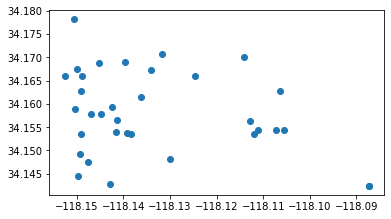

In [7]:
# plot new geodatafrome
psdna_housing_coordinates.plot()

In [8]:
# Save this GDF as a GeoJSON
psdna_housing_coordinates.to_file('Pasadena.geojson', driver = 'GeoJSON')

In [9]:
Pasadena = gpd.read_file('Pasadena.geojson')

<AxesSubplot:>

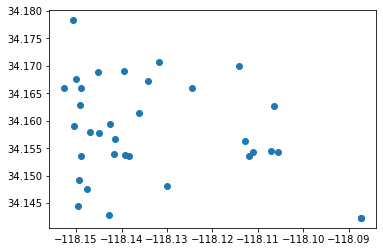

In [10]:
Pasadena.plot()

In [11]:
Pasadena = Pasadena.to_crs(3857)
# converted measurements to mercator, based on meters
Pasadena.head(5)

,PropertyName,PropertyAddress,City,State,Zip,County,CountyCode,CensusTract,CongressionalDistrict,Latitude,Longitude,TargetTenantType,S8_1_ProgramName,LIHTC_1_ProgramName,geometry
0,HFL ASHTABULA HOMES,389 E Ashtabula St,Pasadena,CA,91104-4202,Los Angeles,6037,6037462001,27,34.1593,-118.142477,Family,PRAC/811,,POINT (-13151560.381 4050212.234)
1,CASA D'ORO II,1115 N Chester Ave,Pasadena,CA,91104-2946,Los Angeles,6037,6037462400,27,34.16592,-118.12453,Disabled,PRAC/811,,POINT (-13149562.530 4051102.846)
2,PASADENA ACCESSIBLE APARTMENTS,915 E Rio Grande St,Pasadena,CA,91104-2419,Los Angeles,6037,6037461400,27,34.17059,-118.13181,Disabled,PRAC/811,,POINT (-13150372.936 4051731.161)
3,WYNN HOUSE,1920 E Villa St,Pasadena,CA,91107-2333,Los Angeles,6037,6037462700,27,34.15428,-118.11103,Disabled,PRAC/811,,POINT (-13148059.717 4049536.921)
4,CASA D'ORO I,1370 N Dominion Ave,Pasadena,CA,91104-2708,Los Angeles,6037,6037461300,27,34.16998,-118.11413,Disabled,PRAC/811,,POINT (-13148404.807 4051649.088)


<AxesSubplot:>

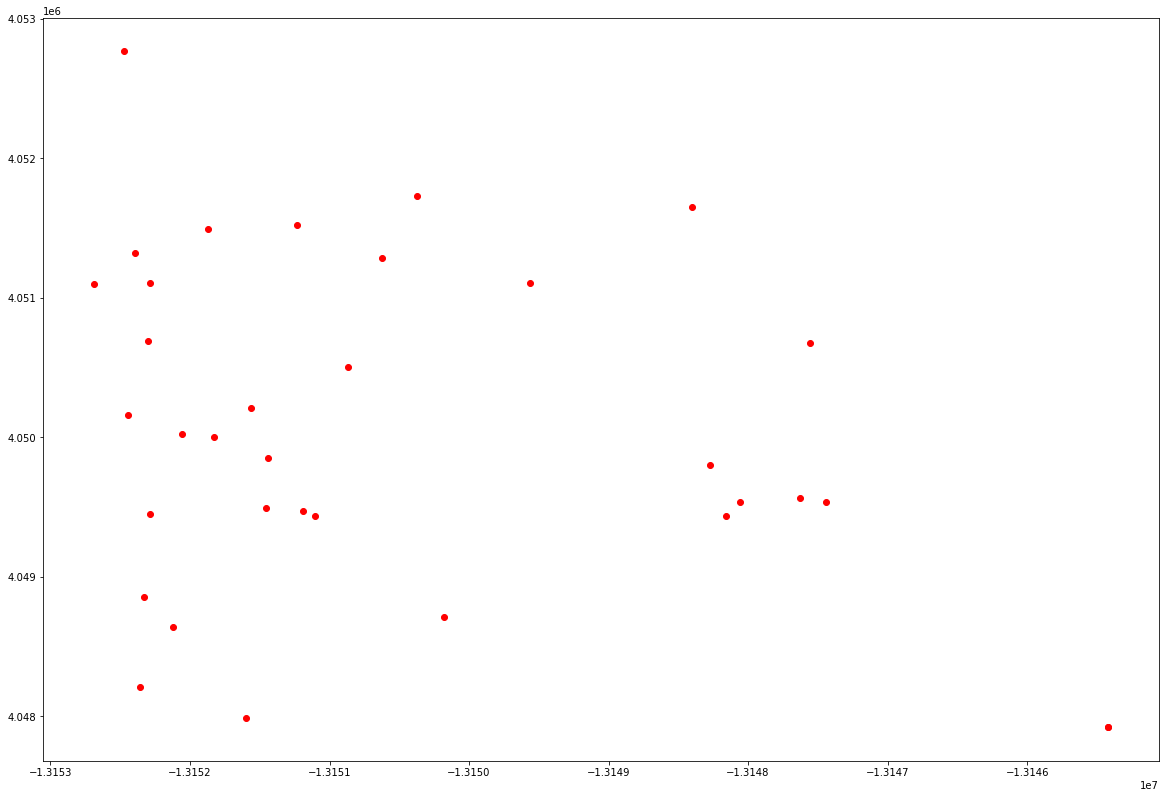

In [12]:
fig, ax = plt.subplots(figsize = (20,20))
Pasadena.plot(ax=ax, color='red')

In [13]:
# configure the place, network type, trip times, and travel speed. I am conducting it by city so that it doesn't slow down the kernel.
place = 'Pasadena, Los Angeles, CA, USA'
network_type = 'walk'
trip_times = [5, 10, 15, 20] #in minutes
meters_per_minute = 75 # travel distance per minute
# will use this code to add the other nodes and edges layers: gdf_edges.plot(ax=ax)

In [14]:
# fetch OSM street network from location and add the walk filter
graph = ox.graph_from_place(place, network_type='walk')

In [15]:
# check data type of graph
type(graph)

networkx.classes.multidigraph.MultiDiGraph

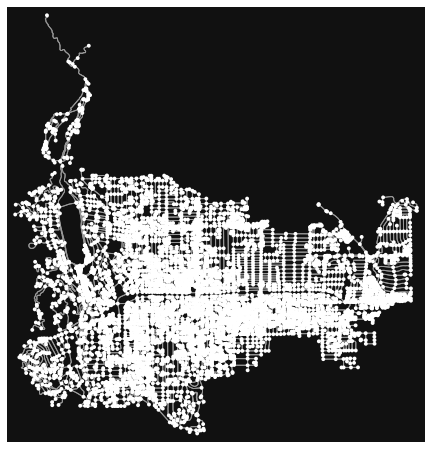

In [16]:
# quick plot using oxmnx
fig, ax = ox.plot_graph(graph)

In [17]:
# project our network data to Web Mercator (measurements are in meters)
G = ox.project_graph(graph, to_crs='epsg:3857')

<AxesSubplot:>

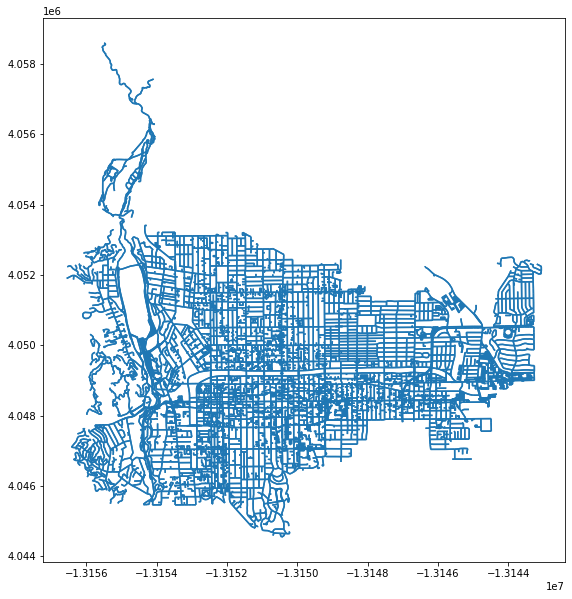

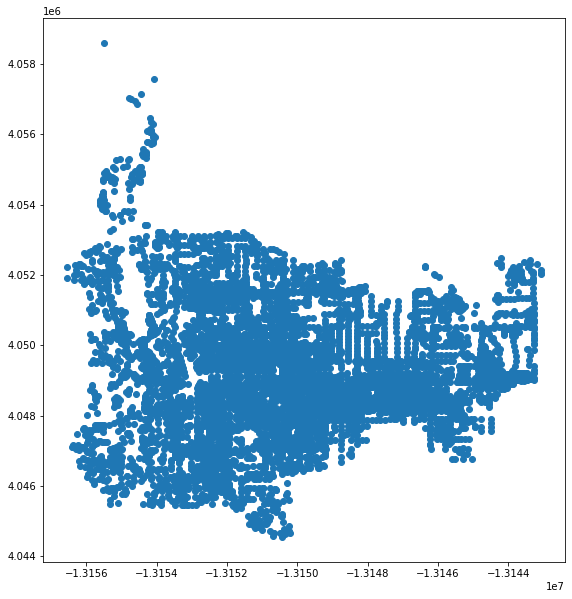

In [18]:
# convert nodes and edges to geodataframes
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges.plot(figsize=(10,10))
gdf_nodes.plot(figsize=(10,10))


<AxesSubplot:>

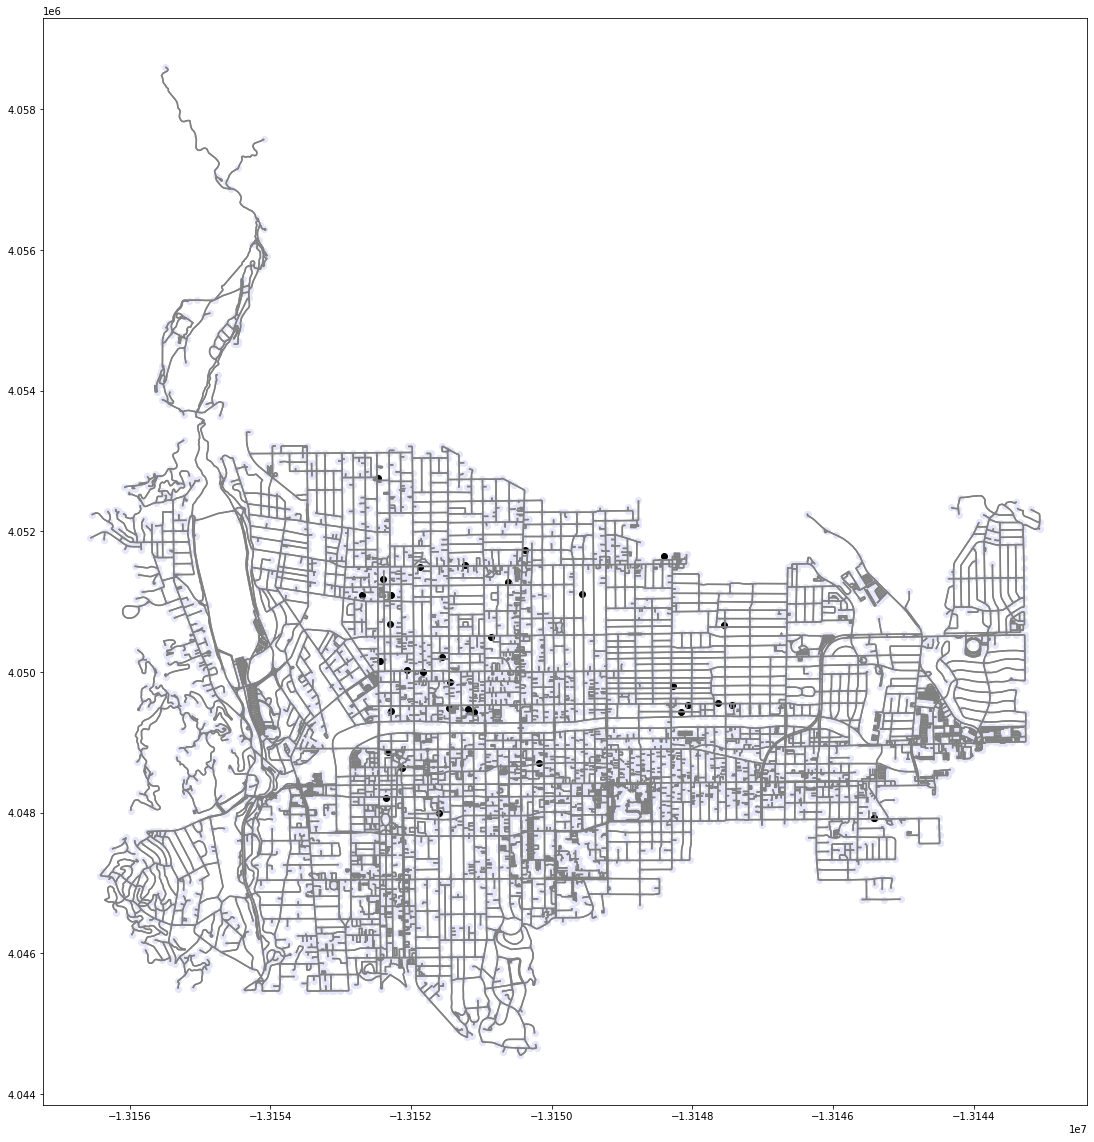

In [19]:
fig, ax = plt.subplots(figsize = (20,20))
gdf_edges.plot(ax=ax, color='gray')
gdf_nodes.plot(ax=ax, color='lavender')
Pasadena.plot(ax=ax, color='black')

In [20]:
# analyze network proprties 
# calculate network statistics
stats = ox.basic_stats(G, circuity_dist='euclidean')
stats

/opt/conda/lib/python3.9/site-packages/osmnx/stats.py:317: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 9097,
 'm': 24358,
 'k_avg': 5.355172034736726,
 'edge_length_total': 1760167.6000000015,
 'edge_length_avg': 72.26240249609991,
 'streets_per_node_avg': 2.7059470154996155,
 'streets_per_node_counts': {0: 0,
  1: 2019,
  2: 0,
  3: 5764,
  4: 1267,
  5: 45,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.22194129932944928,
  2: 0.0,
  3: 0.6336154776299879,
  4: 0.13927668462130371,
  5: 0.00494668572056722,
  6: 0.00021985269869187644},
 'intersection_count': 7078,
 'street_length_total': 880083.7999999981,
 'street_segment_count': 12179,
 'street_length_avg': 72.26240249609968,
 'circuity_avg': 0.8872755743042176,
 'self_loop_proportion': 0.004762295754988094}

In [21]:
# fetch park data
# specify that we're retrieving building footprint geometries
tags = {"leisure": True}

In [22]:
psdna_geom = ox.geometries_from_place(place, tags)

In [23]:
# check the data
psdna_geom.head(5)

ele gnis:feature_id                            name  \
element_type osmid                                                             
node         358788262   213          245251               Lower Arroyo Park   
             358818378   203         1682176                   Busch Gardens   
             358826082   298         1732446  Robert M McCurdy Nature Center   
             358852807   232         2084379                Robinson Stadium   
             1483475043  NaN             NaN                             NaN   

                        natural                     geometry barrier access  \
element_type osmid                                                            
node         358788262      NaN  POINT (-118.16729 34.14029)     NaN    NaN   
             358818378      NaN  POINT (-118.16479 34.12945)     NaN    NaN   
             358826082      NaN  POINT (-118.09674 34.17778)     NaN    NaN   
             358852807      NaN  POINT (-118.11813 34.14251)     NaN    NaN   
             1483475043     NaN  POINT (-118.15593 34.13515)     NaN    NaN   

                        source source_ref gnis:county_id  ... ways name:de  \
element_type osmid                                        ...                
node         358788262     NaN        NaN            037  ...  NaN     NaN   
             358818378     NaN        NaN            037  ...  NaN     NaN   
             358826082     NaN        NaN            037  ...  NaN     NaN   
             358852807     NaN        NaN            037  ...  NaN     NaN   
             1483475043    NaN        NaN            NaN  ...  NaN     NaN   

                        operator:short operator:type operator:wikidata  \
element_type osmid                                                       
node         358788262             NaN           NaN               NaN   
             358818378             NaN           NaN               NaN   
             358826082             NaN           NaN               NaN   
             358852807             NaN           NaN               NaN   
             1483475043            NaN           NaN               NaN   

                        operator:wikipedia ownership protect_class protected  \
element_type osmid                                                             
node         358788262                 NaN       NaN           NaN       NaN   
             358818378                 NaN       NaN           NaN       NaN   
             358826082                 NaN       NaN           NaN       NaN   
             358852807                 NaN       NaN           NaN       NaN   
             1483475043                NaN       NaN           NaN       NaN   

                        type  
element_type osmid            
node         358788262   NaN  
             358818378   NaN  
             358826082   NaN  
             358852807   NaN  
             1483475043  NaN  

[5 rows x 71 columns]

In [24]:
# look at all columns
print(psdna_geom.columns.tolist())

['ele', 'gnis:feature_id', 'name', 'natural', 'geometry', 'barrier', 'access', 'source', 'source_ref', 'gnis:county_id', 'gnis:created', 'gnis:state_id', 'leisure', 'wikidata', 'wikipedia', 'gnis:edited', 'sport', 'website', 'addr:city', 'addr:housenumber', 'addr:state', 'addr:street', 'contact:phone', 'contact:website', 'brand', 'brand:wikidata', 'phone', 'opening_hours', 'brand:wikipedia', 'historic', 'covered', 'operator', 'nodes', 'created_by', 'building', 'lacounty:ain', 'lacounty:bld_id', 'start_date', 'surface', 'lit', 'landuse', 'boundary', 'protection_title', 'alcohol', 'addr:postcode', 'email', 'building:levels', 'dance:style', 'dance:teaching', 'length', 'location', 'swimming_pool', 'max_age', 'min_age', 'golf', 'sport_1', 'access:conditional', 'hoops', 'proposed', 'garden:type', 'area', 'ways', 'name:de', 'operator:short', 'operator:type', 'operator:wikidata', 'operator:wikipedia', 'ownership', 'protect_class', 'protected', 'type']


In [25]:
# look at what is included in the 'leisure' column (ensure that they are all parks)
psdna_geom['leisure'].value_counts()

swimming_pool       294
pitch               125
park                 35
picnic_table         23
playground           22
sports_centre        13
garden               13
fitness_centre       10
outdoor_seating       8
track                 8
golf_course           4
nature_reserve        4
disc_golf_course      2
dance                 2
stadium               2
bleachers             2
horse_riding          2
bowling_alley         1
dog_park              1
Name: leisure, dtype: int64

In [26]:
# include the park, garden, playground, nature_reserve into the data
parks = psdna_geom[psdna_geom['leisure'].isin(['park', 'garden', 'playground'])]

<AxesSubplot:>

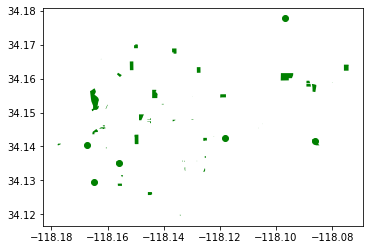

In [27]:
# plot the parks
parks.plot(color='green')

In [28]:
# save basic parks data to geojson
# parks.to_file('Pasadena_basic_parks.geojson', driver = 'GeoJSON')

In [29]:
# removed 'nature_reserve' from the plot because it overwhemed the map; may make separe map focused on just nature reserve
# project the park data
P = ox.projection.project_gdf(parks, to_crs='epsg:3857')

<AxesSubplot:>

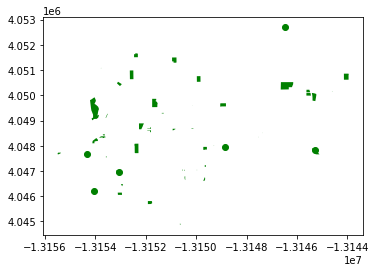

In [30]:
# convert park nodes to geodataframes
park_points = gpd.GeoDataFrame(P, geometry='geometry')

park_points.plot(color='green')

(-13157230.940453896,
 -13142382.4666098,
 4043847.7413281905,
 4059304.2380899223)

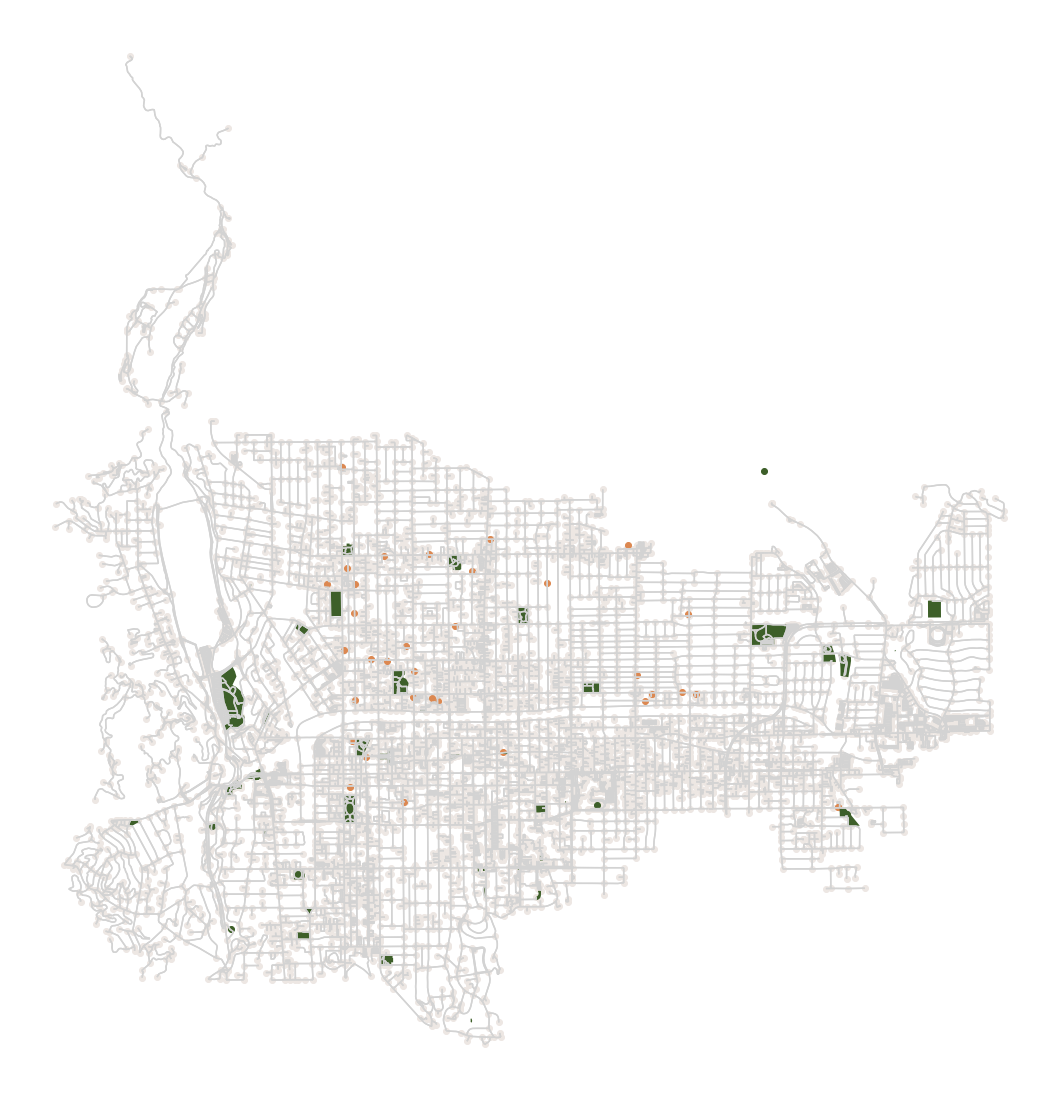

In [31]:
# layer all maps
fig, ax = plt.subplots(figsize = (20,20))
gdf_edges.plot(ax=ax, color='lightgrey')
gdf_nodes.plot(ax=ax, color='#ede7e3')
Pasadena.plot(ax=ax, color='#dc8851')
park_points.plot(ax=ax, color='#3d5f29')
# no axis
ax.axis('off')
# add a basemap ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [32]:
# begin isochrones based on lessons

## Calculating travel cost

Now comes the fun part. We have thus far:

- downloaded nodes and edges for our place of interest
- reprojected them to web mercator for spatial analysis
- converted the data to geodataframes

In order to create isochrone maps, we need to associate a **cost** to each edge in our network. In other words, we need an attribute that tells us exactly how long it would take an average person to traverse the distance of each edge in our network.

In [33]:
# a quick look at the data
gdf_edges[['osmid','name','highway','length']].sample(5)

,,,osmid,name,highway,length
u,v,key,,,,
123160850,2160774782,0,415788598,East Green Street,tertiary,51.649
6753692906,6753692905,0,719411211,NaN,service,127.223
587619001,7883057226,0,"[405142248, 368177168]",East Orange Grove Boulevard,secondary,189.914
2421474992,2421474941,0,233818871,NaN,footway,55.866
122656146,122773192,0,13312260,Alarcon Place,service,46.526


In [34]:
# create a new column, calculate the time it takes to travel that edge
gdf_edges['walk_time'] = gdf_edges['length']/meters_per_minute

Now let's do a spot check. If a person travels 75 meters per minute, do the numbers in the new `walk_time` column make sense?

In [35]:
gdf_edges[['osmid','name','highway','length','walk_time']].sample(10)

,,,osmid,name,highway,length,walk_time
u,v,key,,,,,
7876261982,7876261988,0,844355334,NaN,footway,26.030,0.347067
7690505951,6057714929,0,643827501,NaN,service,36.123,0.481640
2356801231,2356801208,0,226940711,NaN,service,86.164,1.148853
122574965,122574967,0,"[405367322, 405367318, 405367319]",East Walnut Street,tertiary,110.080,1.467733
1446791847,1446791837,0,"[131467693, 131467695]",NaN,footway,92.843,1.237907
122574914,122574919,0,405373680,Walnut Street,secondary,107.155,1.428733
8318229739,123135768,0,627785721,South Euclid Avenue,residential,27.221,0.362947
2240244618,2240244629,0,214485265,NaN,footway,23.668,0.315573
122656146,1784820585,0,167077307,Alarcon Place,service,113.694,1.515920


## Choosing colors (cmap) for our isochrones

- https://matplotlib.org/examples/color/colormaps_reference.html

OSMnx has included a super handy utility [`get_colors`](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=get_colors#osmnx.plot.get_colors) to extract colors from existing cmap color bands. The way it works is that you ask for any number of colors (since we have 4 travel times, we want 4 colors), give it a cmap name, and it returns you a list of colors. 

In [36]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[5, 10, 15, 20]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [37]:
# reverse the sort order so that the darker color matches longer times
trip_times.sort(reverse=True)
print(trip_times)
print(iso_colors)

[20, 15, 10, 5]
['#0d0887', '#9c179e', '#ed7953', '#f0f921']


In [38]:
# create a list of "zipped" time/colors
time_color = list(zip(trip_times, iso_colors))
time_color

[(20, '#0d0887'), (15, '#9c179e'), (10, '#ed7953'), (5, '#f0f921')]

In [39]:
# loop through the list of time/colors
for time,color in list(time_color):
    print('The color for '+str(time)+' minutes is ' + color)

The color for 20 minutes is #0d0887
The color for 15 minutes is #9c179e
The color for 10 minutes is #ed7953
The color for 5 minutes is #f0f921


## Color each node based on travel time from point of interest

Now that we have determined the color for each travel time, let's loop through each time/color, and assign the nodes that fall within that travel time. To do so, we use a feature from [NetworkX called `ego_graph`.](https://networkx.org/documentation/stable//reference/generated/networkx.generators.ego.ego_graph.html) The ego graph determines which nodes fall within a given "radius", which in our case is determined by time.

The following loop does:

- loops through each time/color
- creates an ego graph for each time/color
- assigns the time/color in the geodataframe to each node that falls within

In [57]:
Pasadena["Latitude"] = Pasadena.Latitude.astype(float)
Pasadena["Longitude"] = Pasadena.Longitude.astype(float)
Pasadena.head()
import numpy as np
x = np.arange(0,1)
for i in x:
    lat = Pasadena.iloc[i,10]
    long = Pasadena.iloc[i,11]
    prop_name = Pasadena.iloc[i,1]
    tnt_type = Pasadena.iloc[i,12]
    # configure the place
    place = (lat, long)

In [61]:
# use osmnx's distance.nearest_nodes method to get the ids for the nearest nodes to affordable housing
ox.distance.nearest_edges(G, X=lat, Y=long, interpolate=None, return_dist=False)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# loop through each trip time and associated color
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, Pasadena, radius=time, distance='time')

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        park_points.loc[node,'time'] = str(time) + ' mins'
        park_points.loc[node,'color'] = color

In [ ]:
# converting to geojson to save memory space
# graph theory: nodes and edges
# Use markdown cells!
#zorder is the orders by where layers are drawn
# def begins a function
# . x and .y within geopandas are reserved; can also create x and y columns